# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Career Commodities Trader Warns Bitcoin Community Over Coinbase Concerns.  Peter Brandt is an iconic trader who in the past called the dramatic fall to the Bitcoin bear market bottom, nearly a year ahead of time. Could the commodities trader with decades of experience in all things markets &#8211; who has for sure seen a thing or two in his career &#8211; now be forewarning [&#8230;] ... [| Skaityti daugiau](https://www.newsbtc.com/news/bitcoin/peter-brandt-bitcoin-coinbase-ipo/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Alcohol banned in Nottingham parks as lockdown eases and UK basks in spring sunshine.  UK sees hottest March day since 1968 as warm weather coincides with broadening of social liberties confined by Covid ... [| Skaityti daugiau](http://www.independent.co.uk/news/uk/home-news/nottingham-park-coronavirus-uk-weather-alcohol-ban-b1824639.html) 

### Kainų kaita pandemijos metu

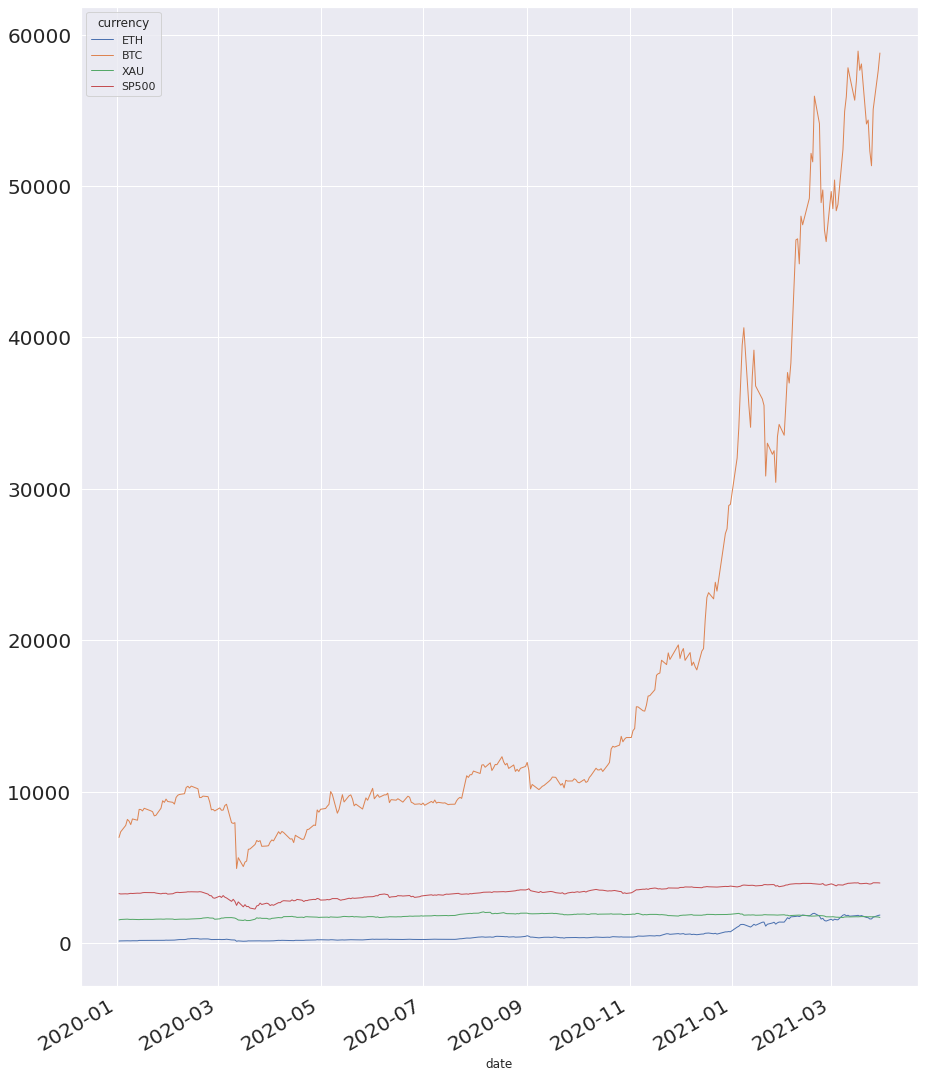

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.984520,0.193210,0.791001
BTC,0.984520,1.000000,0.134315,0.780886
XAU,0.193210,0.134315,1.000000,0.444077
SP500,0.791001,0.780886,0.444077,1.000000


In [8]:
#hide ### Koreliacijos matrica.

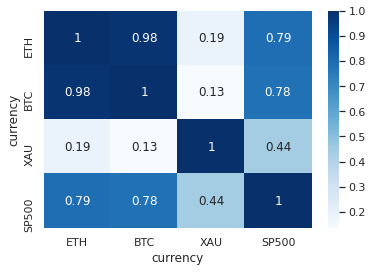

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')